In [389]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from datetime import datetime
from datetime import date
import statsmodels.api as sm
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
fig = plt.gcf() 
fig.set_size_inches(12, 8)
import seaborn as sns
%matplotlib inline
from pathlib import Path, PureWindowsPath

In [351]:
pwd

'C:\\Users\\emman\\Box\\Spring 2020\\Displacement Studio\\Shared 228 Sydney Folder\\AirBnB'

In [450]:
shp_file_path = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/SA2 Shapefiles")
sa2_shape16 = gpd.read_file(shp_file_path/'SA2_2016_AUST.dbf')
sa2_shape16= sa2_shape16[sa2_shape16.GCC_NAME16=='Greater Sydney']
airbnb_df = pd.read_csv('airbnb_sydney_listings.csv')

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's do some cleaning...

In [353]:
list(airbnb_df)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [354]:
# drop these columns because they're either empty or probably won't be of any use
airbnb_df.drop(['thumbnail_url','medium_url','picture_url','xl_picture_url','host_thumbnail_url',
                'instant_bookable','require_guest_phone_verification','neighbourhood_group_cleansed',
                'host_acceptance_rate','jurisdiction_names','host_url','host_response_time','host_response_rate',
                'host_is_superhost','host_picture_url','host_total_listings_count','host_verifications',
               'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm','calendar_updated','number_of_reviews','number_of_reviews_ltm',
                'first_review','last_review','review_scores_rating','review_scores_accuracy',
                'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                'review_scores_location','review_scores_value',],axis=1,inplace=True)

In [355]:
# we need to look at what different kinds of properties exist on airbnb and drop the ones that are not homes, 
# apartments, etc. 
airbnb_df.property_type.value_counts()
# we propbably don't need castle, other, tent, island, train, boat, or any other of the ridiculous values that are
# in here. 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Boutique hotel')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Bungalow')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Bed and breakfast')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Hostel')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Other')]  
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Hotel')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Boat')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Camper/RV')] 
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Aparthotel')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Farm stay')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Tent')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Earth house')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Chalet')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Island')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Barn')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Resort')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Casa particular (Cuba)')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Yurt')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Train')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Treehouse')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Castle')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Heritage hotel (India)')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Campsite')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Dome house')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Hut')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Minsu (Taiwan)')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Cave')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Tipi')]
airbnb_df = airbnb_df[(airbnb_df.property_type != 'Casa particular')]

In [356]:
airbnb_df['count']=1

In [357]:
airbnb_df.property_type.value_counts()

Apartment             22462
House                 10244
Townhouse              1723
Condominium             825
Guest suite             609
Guesthouse              500
Villa                   324
Loft                    241
Serviced apartment      228
Cottage                 141
Cabin                    69
Tiny house               49
Name: property_type, dtype: int64

In [365]:
# Clean date values to be actual dates
airbnb_df['host_since']=pd.to_datetime(airbnb_df['host_since'])
airbnb_df['last_scraped']=pd.to_datetime(airbnb_df['last_scraped'])

# pull individual year from host_since variable
airbnb_df['hs_year'] = pd.DatetimeIndex(airbnb_df['host_since']).year
airbnb_df['hs_year'].dropna(inplace=True)
airbnb_df['hs_year'].astype(int)

# fill in nulls with 0 or f
airbnb_df.bathrooms.fillna(0,inplace=True)

In [425]:
# Create a shapely.geometry.Point for each tweet
geometry = [Point(xy) for xy in zip(airbnb_df['longitude'], airbnb_df['latitude'])]
crs = {'init' :'epsg:4326'}
# Convert to GeoDataFrame, where each tweet's geometry is assigned to the lat/lon coords
airbnb_gdf = gpd.GeoDataFrame(airbnb_df, crs=crs, geometry=geometry)

In [367]:
airbnb_df.shape

(37415, 72)

In [368]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37415 entries, 0 to 38336
Data columns (total 72 columns):
id                                              37415 non-null int64
listing_url                                     37415 non-null object
scrape_id                                       37415 non-null float64
last_scraped                                    37415 non-null datetime64[ns]
name                                            37404 non-null object
summary                                         36018 non-null object
space                                           26163 non-null object
description                                     36461 non-null object
experiences_offered                             37415 non-null object
neighborhood_overview                           23209 non-null object
notes                                           15139 non-null object
transit                                         23611 non-null object
access                                     

In [369]:
airbnb_df.describe()

,id,scrape_id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,count,hs_year
count,3.741500e+04,3.741500e+04,3.741500e+04,37409.000000,37415.000000,37415.000000,37415.000000,37415.000000,37373.000000,37370.000000,209.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,26938.000000,37415.0,37409.000000
mean,2.250878e+07,2.019110e+13,8.215042e+07,8.469887,-33.863012,151.199557,3.444367,1.363491,1.602735,2.007546,471.540670,1.620473,6.681785,15.249258,25.878070,88.345690,7.074516,6.151009,0.771803,0.101697,1.101814,1.0,2015.373573
std,1.097062e+07,0.000000e+00,8.146521e+07,27.940927,0.072062,0.087319,2.257149,0.668110,1.075408,1.529744,1691.848201,1.394714,10.107834,20.005139,31.275848,119.620899,22.036336,22.006256,1.990849,1.264379,1.499681,0.0,2.047202
min,1.115600e+04,2.019110e+13,1.289400e+04,0.000000,-34.135210,150.601470,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.0,2009.000000
25%,1.404523e+07,2.019110e+13,1.684168e+07,1.000000,-33.898485,151.176265,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.110000,1.0,2014.000000
50%,2.230922e+07,2.019110e+13,4.899394e+07,1.000000,-33.881740,151.213470,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,8.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.440000,1.0,2015.000000
75%,3.150027e+07,2.019110e+13,1.331896e+08,3.000000,-33.830615,151.259260,4.000000,1.500000,2.000000,3.000000,538.000000,2.000000,12.000000,28.000000,50.000000,149.000000,2.000000,1.000000,1.000000,0.000000,1.510000,1.0,2017.000000
max,3.987906e+07,2.019110e+13,3.070734e+08,357.000000,-33.389730,151.339870,16.000000,11.000000,16.000000,29.000000,21528.000000,16.000000,30.000000,60.000000,90.000000,365.000000,173.000000,173.000000,26.000000,28.000000,14.120000,1.0,2019.000000


In [372]:
#Grouping by host IDs how many days out of the year, on average, are their listings available?
h_n_list_av = pd.DataFrame({'avg_nights_365' : airbnb_df.groupby('property_type')['availability_365'].mean()}).reset_index()
h_n_list_av.sort_values(by='avg_nights_365',ascending= False)

,property_type,avg_nights_365
1,Cabin,197.710145
8,Serviced apartment,183.631579
9,Tiny house,155.571429
11,Villa,150.898148
5,Guesthouse,144.610000
4,Guest suite,131.574713
3,Cottage,123.510638
7,Loft,102.721992
6,House,102.317259
10,Townhouse,89.557168


## Analyzing the patterns of growth for different AirBnB property types

In [383]:
prop_year = pd.pivot_table(airbnb_df,index='property_type',columns='hs_year',values='count',aggfunc=np.sum,fill_value=0)
prop_year.reset_index(inplace=True)
prop_year.columns=(['property_type','2009','2010','2011','2012','2013',
                    '2014','2015','2016','2017','2018','2019'])
prop_year_melt = pd.melt(prop_year, 
        id_vars='property_type',
        value_vars = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],
        value_name='prop_count')
prop_year_melt

,property_type,variable,prop_count
0,Apartment,2009,17
1,Cabin,2009,0
2,Condominium,2009,0
3,Cottage,2009,0
4,Guest suite,2009,0
5,Guesthouse,2009,2
6,House,2009,13
7,Loft,2009,2
8,Serviced apartment,2009,0
9,Tiny house,2009,0


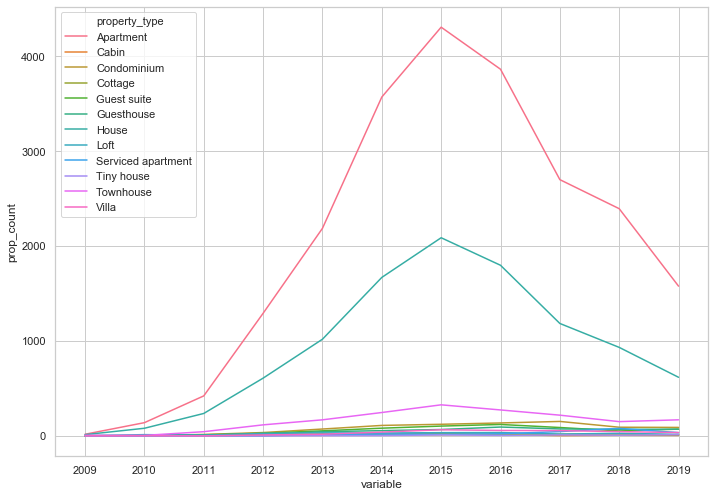

In [392]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.lineplot(x='variable', y='prop_count', data=prop_year_melt, hue='property_type',ax=ax)

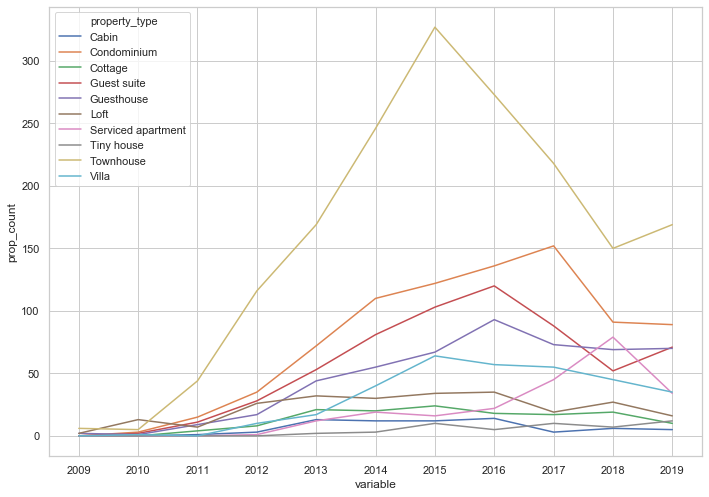

In [394]:
prop_year_melt=prop_year_melt[prop_year_melt.property_type!='Apartment']
prop_year_melt=prop_year_melt[prop_year_melt.property_type!='House']
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.lineplot(x='variable', y='prop_count', data=prop_year_melt, hue='property_type',ax=ax)

In [322]:
airbnb_df.property_type.value_counts()

Apartment             22462
House                 10244
Townhouse              1723
Condominium             825
Guest suite             609
Guesthouse              500
Villa                   324
Loft                    241
Serviced apartment      228
Cottage                 141
Cabin                    69
Tiny house               49
Name: property_type, dtype: int64

## Analyzing trends for number of hosts that have more than one listing in AirBnB

I think it's important to separate out the groups that have more than one AirBnB listing because of our stressing of how financialization of housing affects the market. In our literature review, we found that about 1/5 of Australians own more than one home. If that's the case, let's see how many times there are more than three, and then how the distribution of them look in a scatter plot

### Question 1: Of the hosts that have >= 2 properties, how are they distributed spatially?

Methodology: 

1. Isolate host_ids where hosts own more than 3 properties
1. Let's work on a heatmap where the points on a map show where the distribution of properties that hosts have >= 2 listings are

In [409]:
from scipy import ndimage
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6

,host_id,cnt_list_host
0,12894,1
1,14093,2
2,15030,2
3,17020,1
4,17061,2
5,17331,2
6,18459,1
7,19082,1
8,20258,2
9,21741,1


In [512]:
#create a dataframe out of a groupby that groups host IDs and counts the listing IDs in associated to them
test_df = pd.DataFrame({'cnt_list_host' : airbnb_df.groupby('host_id')['id'].count()}).reset_index()
# create a new geodataframe that only has listing id, host id, and geometry
test_gdf2 = airbnb_gdf[['id','host_id','geometry']]
# test merge 
test_merge = pd.merge(test_df,test_gdf2,on='host_id',how='left')
# isolate new dataframe to only have listings where the count of listings per host are >=2
test_merge = test_merge[test_merge.cnt_list_host>=2]
# create a new geodataframe
tm_gdf = gpd.GeoDataFrame(test_merge, crs=crs)
#perform a geospatial join on the new test dataframe so that we can perform this at the sa2 level
tm_gdf2 = gpd.sjoin(tm_gdf,sa2_shape16,how='right',op='within')

In [514]:
tm_gdf2.dropna()
tm_gdf2= tm_gdf2.reset_index()

In [440]:
# create a new dataframe that isolates the hosts with more than three listings in AirBnB
hw2l= airbnb_gdf.loc[airbnb_df.host_listings_count>=2]
hw2l.isnull().sum()
hw2l.dropna(thresh=0,inplace=True)
sa2_shape16.isnull().sum()
sa2_shape16.dropna(inplace=True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [443]:
# spatial join with the nsw data
hw2l_shp = gpd.sjoin(hw2l,sa2_shape16,how='left',op='within')
#drop all columns that won't be of any use in this analysis 
hw2l_shp.drop(['thumbnail_url','medium_url','picture_url','xl_picture_url','host_thumbnail_url',
                'instant_bookable','require_guest_phone_verification','neighbourhood_group_cleansed',
                'host_acceptance_rate','jurisdiction_names','host_url','host_response_time','host_response_rate',
                'host_is_superhost','host_picture_url','host_total_listings_count','host_verifications',
               'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm','calendar_updated','number_of_reviews','number_of_reviews_ltm',
                'first_review','last_review','review_scores_rating','review_scores_accuracy',
                'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                'review_scores_location','review_scores_value',],axis=1,inplace=True)

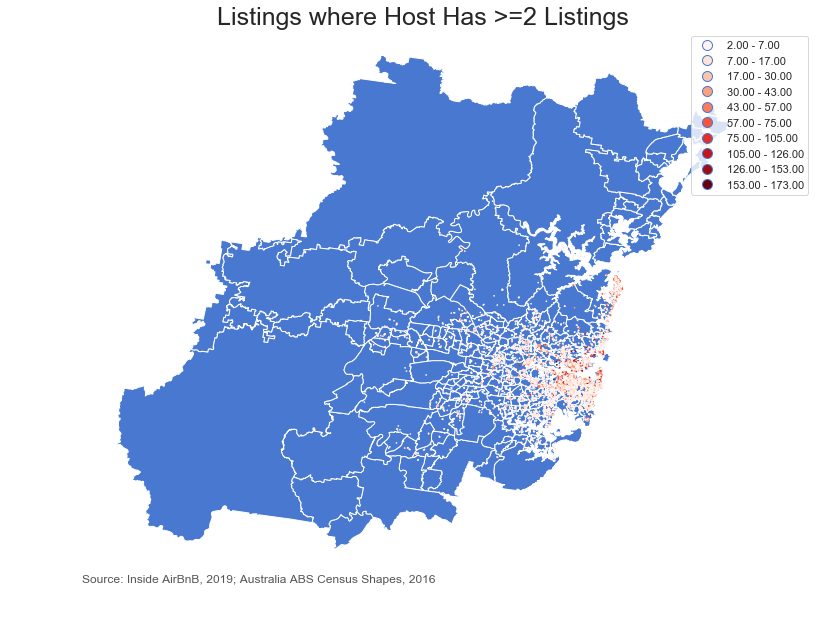

In [519]:
figure, ax = plt.subplots(figsize=(14,10))
base = sa2_shape16.plot(ax=ax)
tm_gdf.plot(column="cnt_list_host", 
              scheme = "fisher_jenks", 
              k = 10, 
              legend=True, 
              ax=base, 
              cmap="Reds",
             markersize=.5)
lims=plt.axis("equal")
ax.set_axis_off()

ax.set_title('Listings where Host Has >=2 Listings', fontdict={'fontsize':25})

ax.annotate('Source: Inside AirBnB, 2019; Australia ABS Census Shapes, 2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

In [412]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


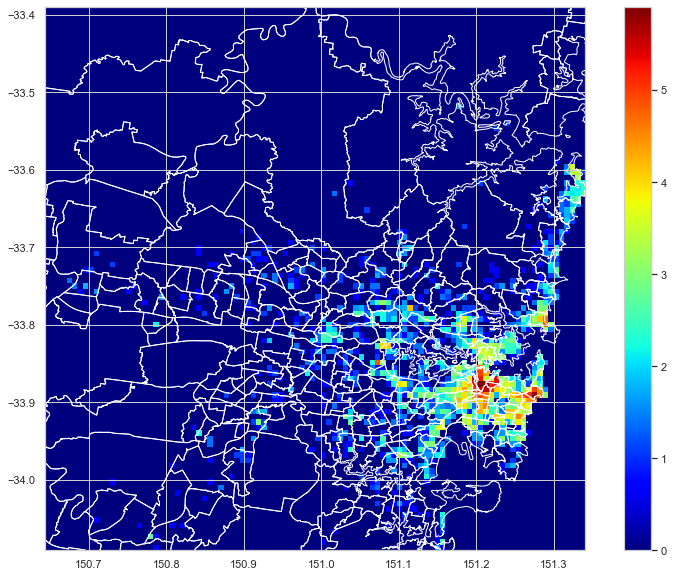

In [526]:
pts = tm_gdf
figure, ax = plt.subplots(figsize=(14,10))
base = sa2_shape16.plot(ax=ax,color='')
heatmap(pts, bins=100, smoothing=.25,)

In [408]:
# sns.set(style="whitegrid", palette="muted")
# hw2l_melt = pd.melt(hw3l, 
#                     id_vars=['property_type','host_listings_count','geometry'],
#                     value_vars="count", var_name="Property Types")
# hw2l_melt


,property_type,host_listings_count,geometry,Property Types,value
0,Apartment,3.0,POINT (151.21654 -33.88045),count,1
1,Apartment,9.0,POINT (151.25231 -33.90917),count,1
2,Apartment,4.0,POINT (151.27827 -33.88885),count,1
3,Apartment,4.0,POINT (151.27891 -33.88869),count,1
4,Townhouse,3.0,POINT (151.20495 -33.89396),count,1
5,House,3.0,POINT (151.29036 -33.694),count,1
6,Apartment,4.0,POINT (151.22378 -33.87273),count,1
7,House,3.0,POINT (151.27225 -33.88904),count,1
8,House,3.0,POINT (151.29355 -33.70017),count,1
9,House,4.0,POINT (151.24467 -33.88633),count,1


In [ ]:
prop_year = pd.pivot_table(airbnb_df,index='property_type',
                           columns='hs_year',
                           values='count',aggfunc=np.sum,fill_value=0)
prop_year.reset_index(inplace=True)

In [297]:
# Grouping by host IDs how many hosts own more than 2 listings
h_n_list = pd.DataFrame({'cnt_list_host' : airbnb_df.groupby('host_id')['id'].count()}).reset_index()
mer_df = airbnb_df[['host_id','hs_year','property_type','room_type']]
hnlav_df = pd.merge(h_n_list,mer_df,on='host_id',how='left')

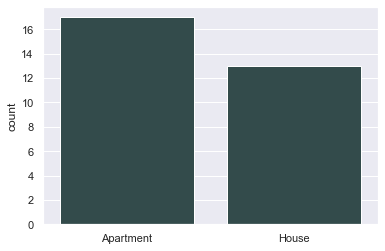

In [309]:
data = hnlav_df.loc[(hnlav_df.hs_year==2009) & ((hnlav_df.property_type=='Apartment')|
                                                (hnlav_df.property_type=='House'))]

ax = sns.countplot(data=data, x='property_type', color='darkslategray')

# Seaborn can pass us a Matplotlib "axes" object for editing the labels
ax.set_title("")
#ax.set_xticklabels(['walk', 'cycle', 'drive', 'bus', 'train'])
ax.set_xlabel('')

plt.show()

In [182]:
airbnb_df.host_id.value_counts()

7409213      173
36410227     153
15739069     145
15469257     126
235137306    105
2450066      104
137278159     75
11914644      71
24721535      67
113874        61
216159830     57
189112177     53
101139031     49
15193662      47
189309820     47
167340072     47
23717928      46
3046924       43
148607219     42
297512659     42
225489194     40
70570922      39
38478183      38
103385102     38
16026854      38
91961414      37
258232004     37
41215678      35
21058208      35
43736801      35
226913216     34
117548275     32
56899852      32
27286333      32
213432683     30
108083073     30
4298915       29
153195376     28
159933426     27
155298891     27
249002345     27
95214788      27
21385139      27
88800829      26
293274101     26
33325403      26
295047727     26
14138978      26
218321838     25
261331217     25
288743418     25
178729132     25
267733940     24
216689132     23
91932622      23
122429362     23
91587706      22
8530753       22
15118978      

In [190]:
hnlav_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38331 entries, 0 to 38330
Data columns (total 7 columns):
host_id          38331 non-null int64
hs_year_x        38331 non-null int64
cnt_list_host    38331 non-null int64
id               38331 non-null int64
hs_year_y        38331 non-null int64
property_type    38331 non-null object
room_type        38331 non-null object
dtypes: int64(5), object(2)
memory usage: 2.3+ MB


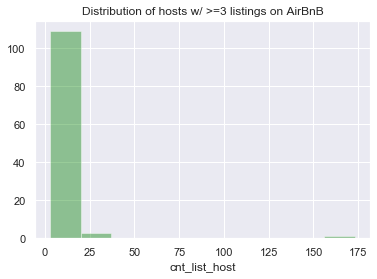

In [196]:
# subset the data to only include hosts that have more than 1 listing (onviously these people are loaded)
data = h_n_list_av.loc[(h_n_list_av['hs_year'] == 2013) & 
                 (h_n_list_av.cnt_list_host >= 3)]

ax = sns.distplot(a = data.cnt_list_host,
                  bins = 10,
                  color = 'green',
                 hist=True,
                 kde=False)

ax.set_title('Distribution of hosts w/ >=3 listings on AirBnB')
plt.show()

In [200]:
airbnb_df['count'] = 1
airbnb_df['count']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
30       1
31       1
32       1
33       1
34       1
35       1
36       1
37       1
38       1
39       1
40       1
41       1
42       1
43       1
44       1
45       1
46       1
47       1
48       1
49       1
50       1
51       1
52       1
53       1
54       1
55       1
56       1
57       1
58       1
59       1
60       1
61       1
62       1
63       1
64       1
65       1
66       1
67       1
68       1
69       1
70       1
71       1
72       1
73       1
74       1
75       1
76       1
77       1
78       1
79       1
80       1
81       1
82       1
83       1
84       1
85       1
86       1
87       1
88       1
89       1
90       1

In [216]:
airbnb_df.property_type.value_counts()

Apartment                 22462
House                     10244
Townhouse                  1723
Condominium                 825
Guest suite                 609
Guesthouse                  500
Villa                       324
Loft                        241
Serviced apartment          228
Boutique hotel              218
Bungalow                    185
Cottage                     141
Bed and breakfast           140
Hostel                      116
Other                        72
Cabin                        69
Hotel                        67
Tiny house                   49
Boat                         26
Camper/RV                    22
Aparthotel                   15
Farm stay                    10
Tent                         10
Earth house                   7
Chalet                        5
Island                        4
Barn                          4
Resort                        3
Tipi                          2
Casa particular (Cuba)        2
Yurt                          2
Train   

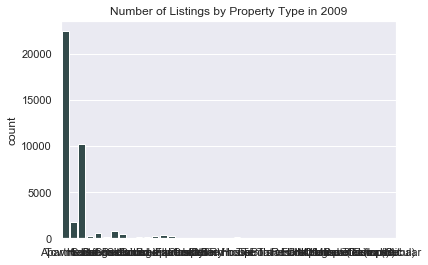

In [215]:
# let's plot out the different kinds of housing types by year
data = airbnb_df #.loc[(airbnb_df['hs_year'] == 2009)
                     
ax = sns.countplot(data=data, x='property_type', color='darkslategray')

ax.set_title('Number of Listings by Property Type in 2009')
#ax.set_xticklabels(['walk', 'cycle', 'drive', 'bus', 'train'])
ax.set_xlabel('')

plt.show()

In [208]:
# Let's look at the upper range of hosts that have 3 or more listings
up_hosts = airbnb_df.loc[airbnb_df.host_total_listings_count>=3]

Next steps: 

* Aggregate total host listings in dataframe and apply point geometry 
* Have them be inside of each one of the SA2s 
* Look at the distribution of where the most listings per host are in the Greater Sydney region 

AttributeError: 'WindowsPath' object has no attribute 'plot'

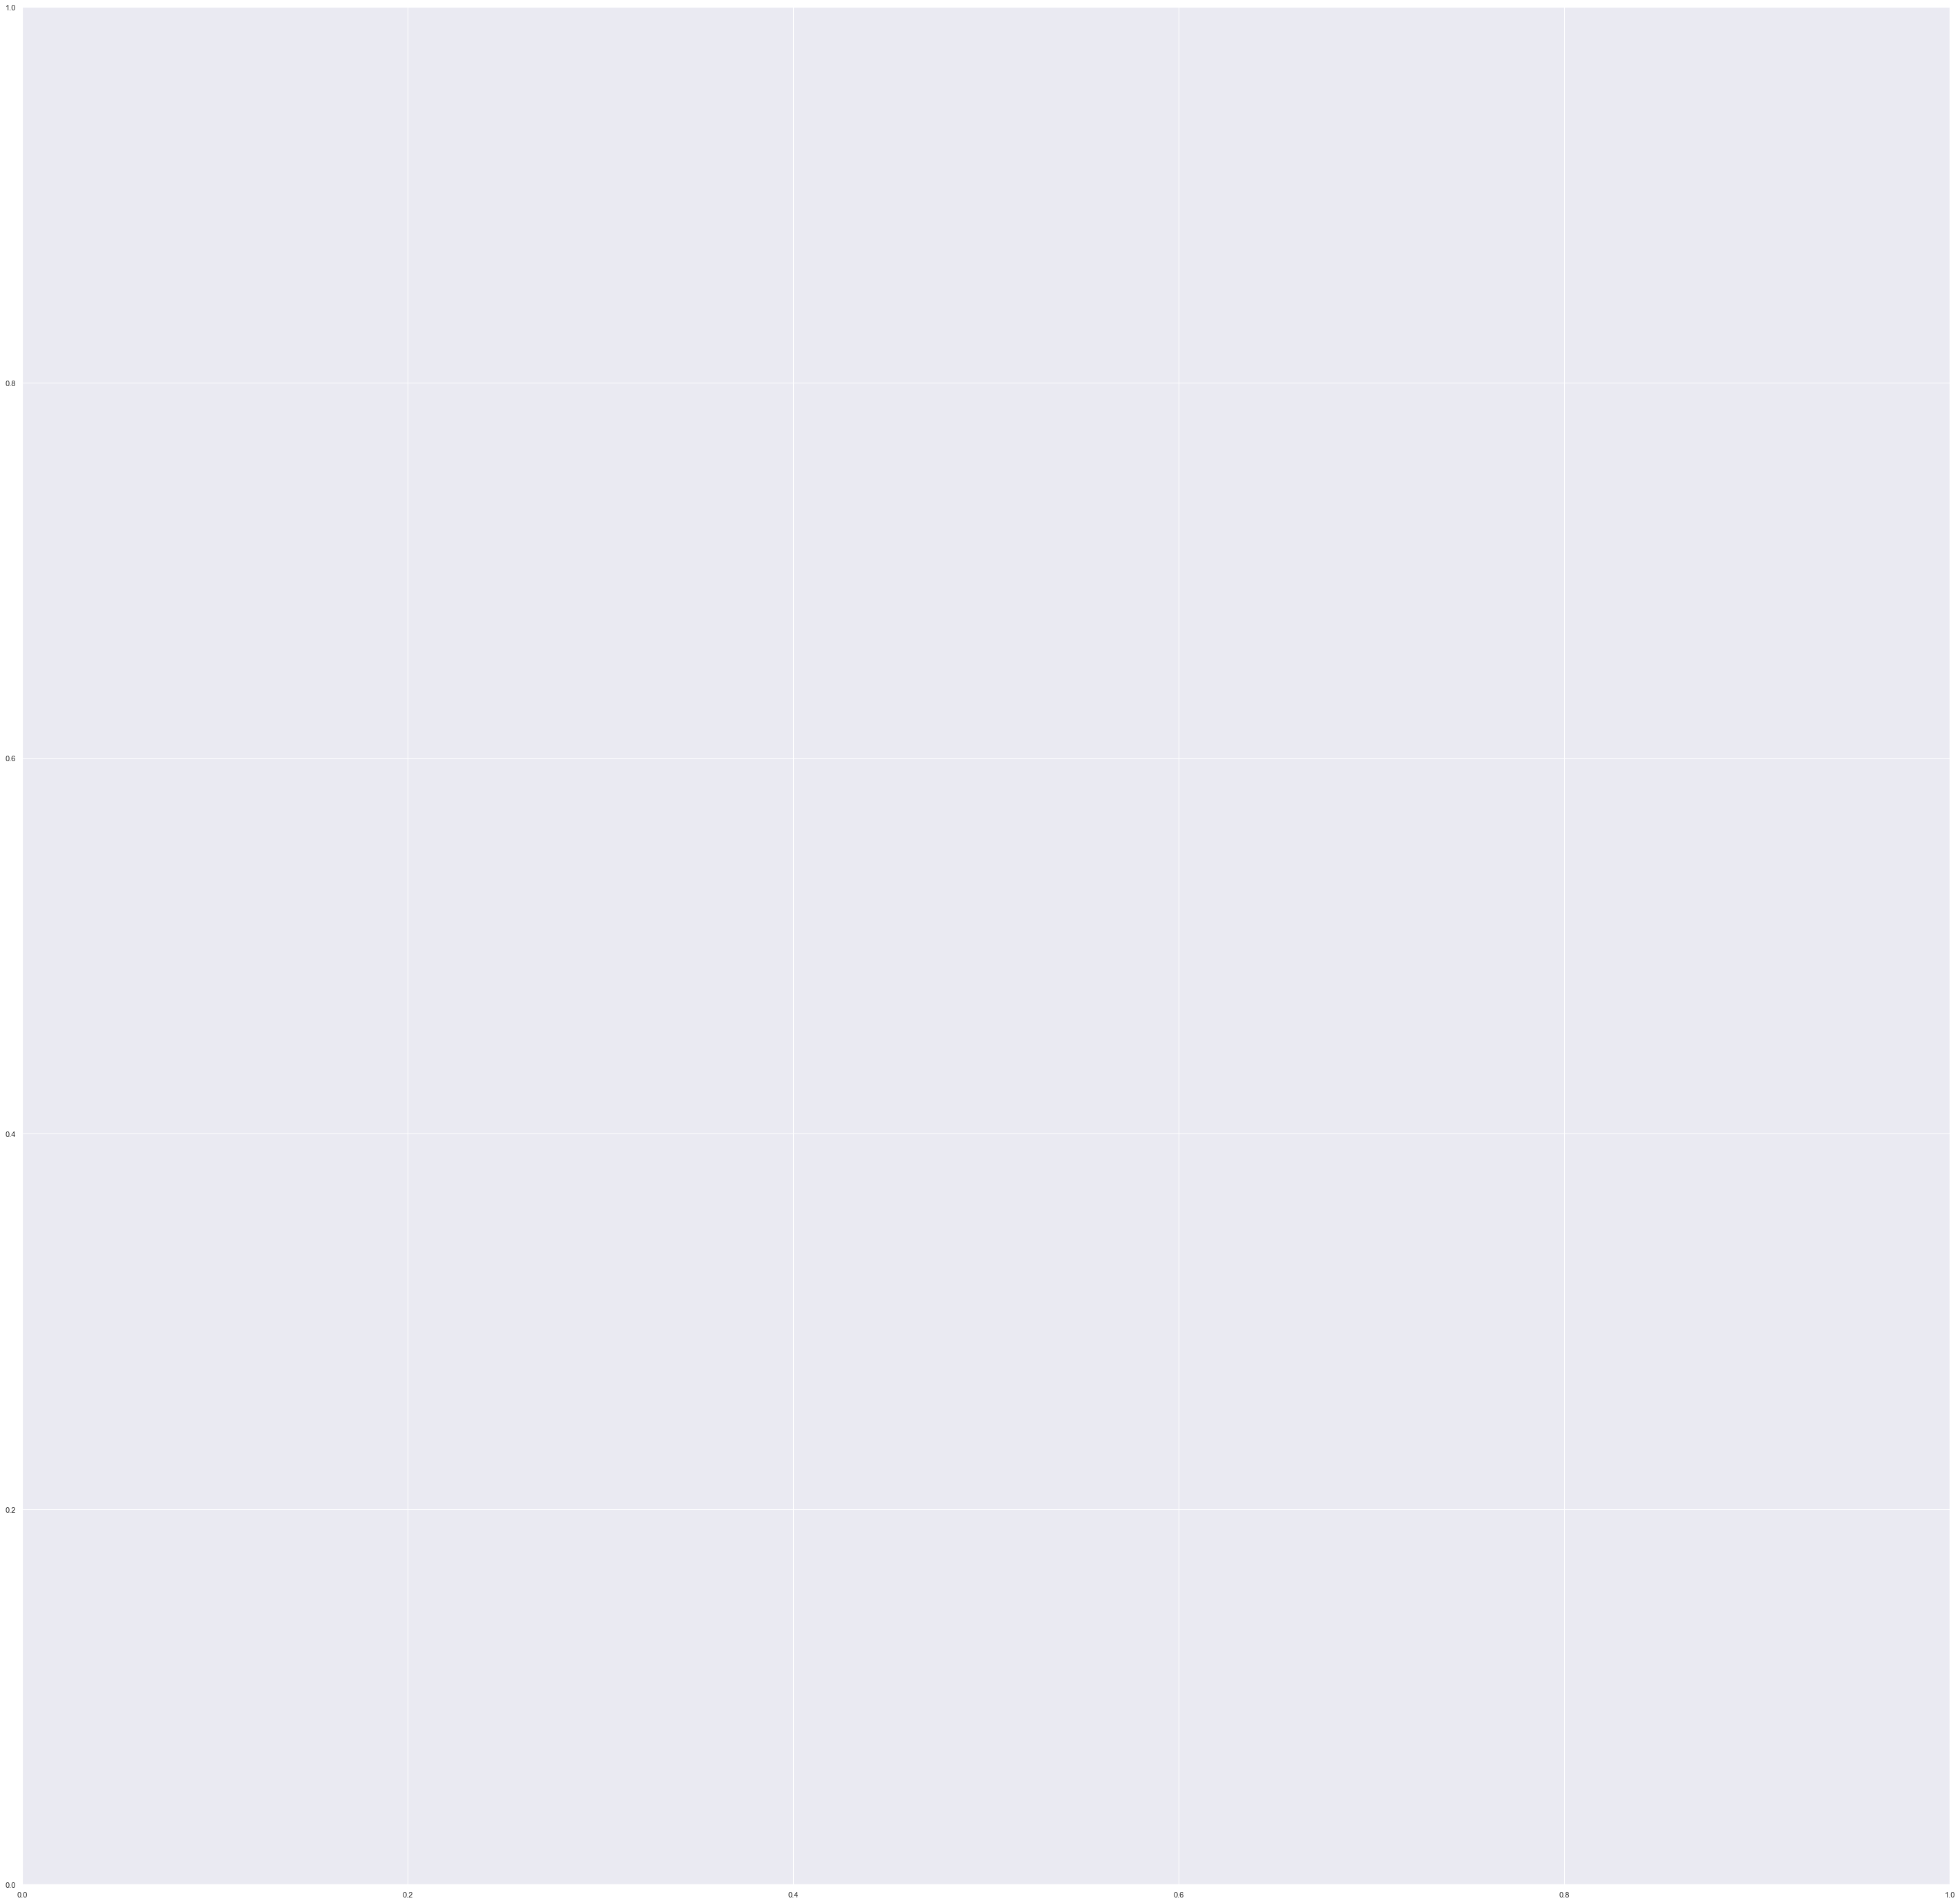

In [203]:
figure, ax = plt.subplots(figsize=(50,50))
base = sa2_shape16.plot(column='STE_CODE16', legend=True, ax=ax, cmap='Greys')
airbnb_gdf.plot(ax=base, markersize=10, color="orange")
sa2_shape.plot(ax=base, facecolor='none', edgecolor="black", linewidth=1)

lims=plt.axis("equal")
ax.set_axis_off()

ax.set_title('AirBnB Listings in Sydney, 2019', fontdict= 
            {'fontsize':75})

plt.show()